In [15]:
!pip install --upgrade shap


Abstract:

The aim of this study is to interpret models predicting happiness scores using a dataset containing various socio-economic indicators. The dataset comprises features such as GDP per capita, social support, life expectancy, freedom to make life choices, generosity, and perceptions of corruption, among others. The target variable is the happiness score, reflecting subjective well-being reported by individuals in different countries.

Our objectives are as follows:

Linear Model Interpretation: We aim to fit a linear regression model to the data and interpret the regression coefficients. This involves understanding how each feature contributes to the prediction of happiness scores and identifying which factors have a significant impact on subjective well-being.

Tree-Based Model Interpretation: We plan to train a tree-based model, specifically a decision tree regressor, and interpret the decision nodes. By visualizing the decision tree, we aim to gain insights into the hierarchical structure of the model and identify the most influential features in predicting happiness scores.

AutoML Model Selection: Utilizing automated machine learning (AutoML) techniques, we intend to identify the best-performing model for predicting happiness scores. This involves exploring various algorithms and hyperparameters to optimize model performance while minimizing overfitting.

SHAP Analysis: Finally, we will conduct SHAP (SHapley Additive exPlanations) analysis on the models from steps 1, 2, and 3. SHAP analysis provides a unified framework for interpreting the impact of features on model predictions. By comparing SHAP values across different models, we aim to understand the relative importance of each feature and evaluate the consistency of model interpretability methods.

Through these analyses, we seek to enhance our understanding of the factors influencing subjective well-being and provide insights that can inform policy decisions aimed at promoting happiness and well-being in society.

In [16]:
!pip install h2o
!pip install xgboost

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [18]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/prachichatur04/World-Happiness-Report-data-scienece-project/main/2017.csv"
)

In [19]:
data.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [20]:
# Viewing data in the file
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [9]:
import pandas as pd

# Count the number of NaNs in each column
nan_counts = data.isna().sum()

# Print the count of NaNs for each column
print(nan_counts)

# To only display columns that contain NaNs:
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64
Series([], dtype: int64)


In [10]:
data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


<Axes: >

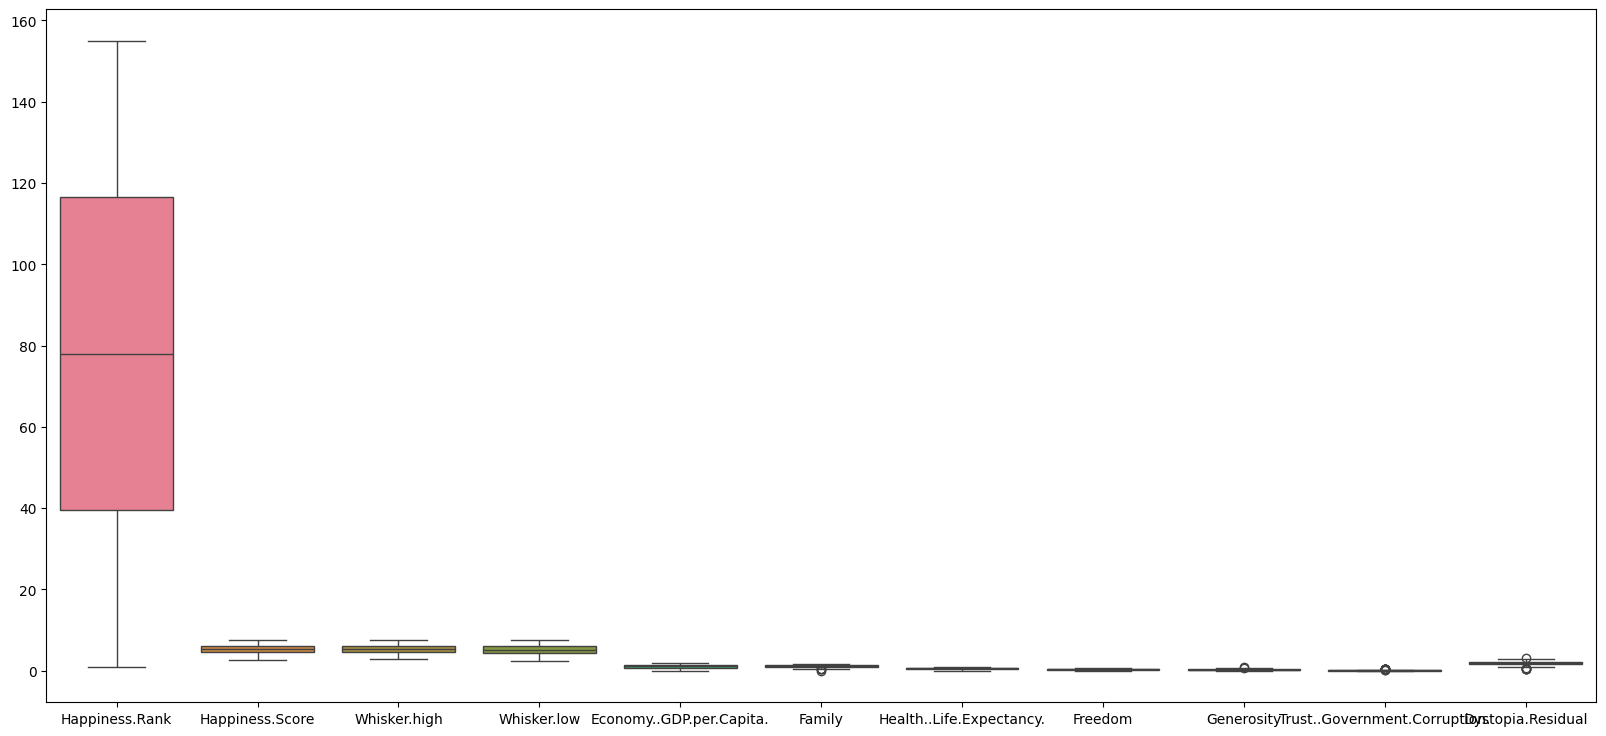

In [11]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

In [12]:
# Assuming 'target' is your target variable. Replace 'target' with your actual target column name.
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

In [17]:
print(f"Mean value: {round(y.mean(), 2)}")

Mean value: 5.35


In [21]:
!pip install shap
!pip install tpot


Linear Regression Coefficients:
                         feature  coefficient
0       Economy..GDP.per.Capita.     1.000161
1                         Family     0.999909
2       Health..Life.Expectancy.     0.999812
3                        Freedom     1.000107
4                     Generosity     1.000306
5  Trust..Government.Corruption.     0.999669
6              Dystopia.Residual     0.999949


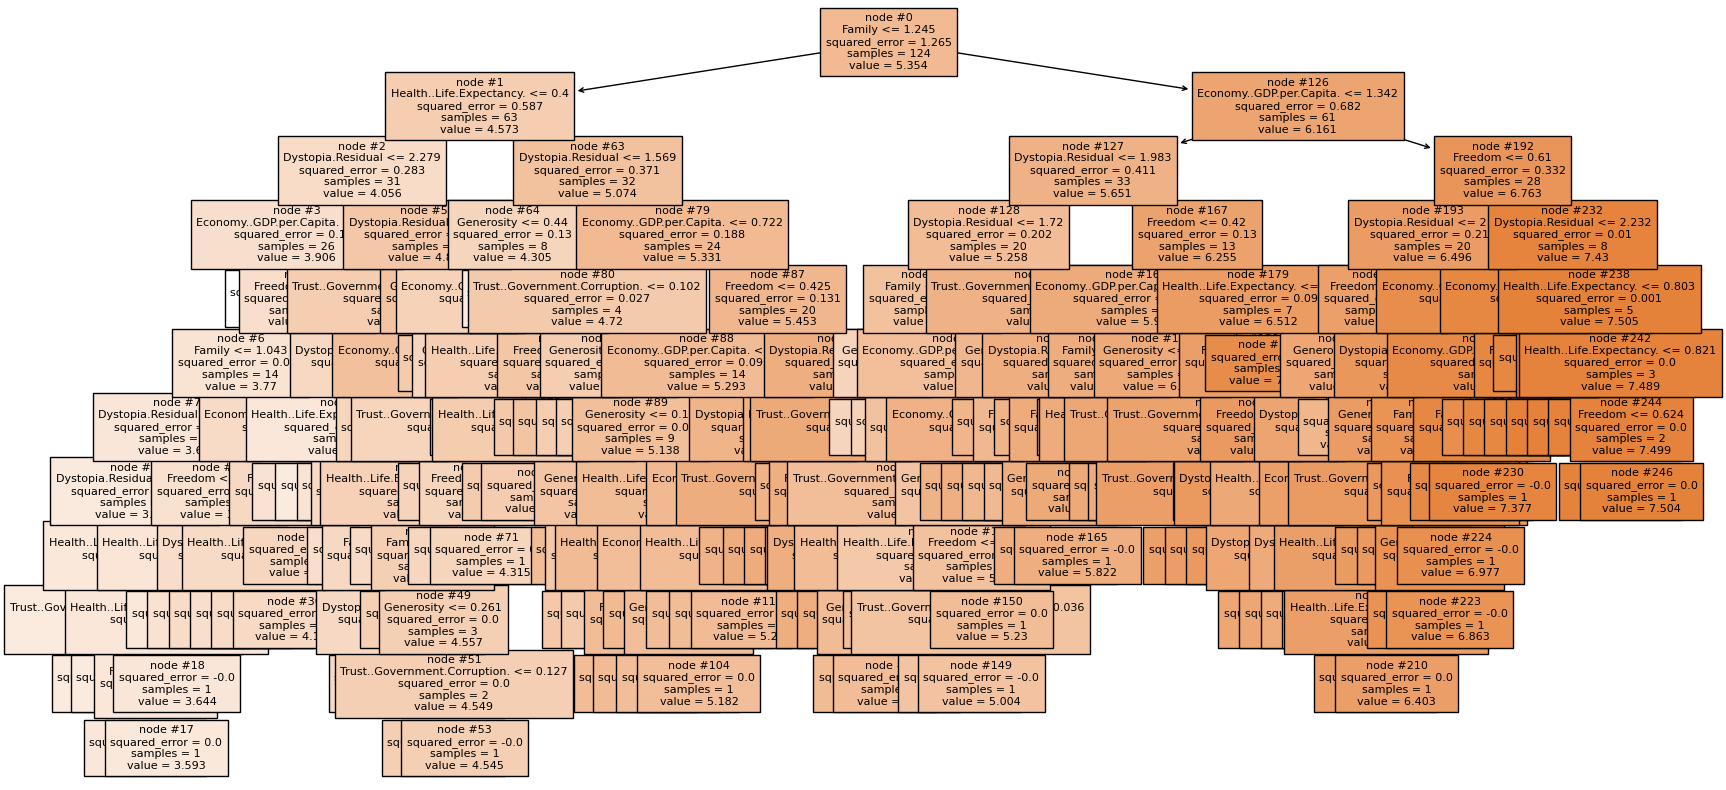

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.294477065301327e-05

Generation 2 - Current best internal CV score: -2.294477065301327e-05

Generation 3 - Current best internal CV score: -2.286327710518981e-05

Generation 4 - Current best internal CV score: -9.570204325417246e-06

Generation 5 - Current best internal CV score: -2.9431510398365975e-06

Best pipeline: ElasticNetCV(RobustScaler(input_matrix), l1_ratio=1.0, tol=1e-05)


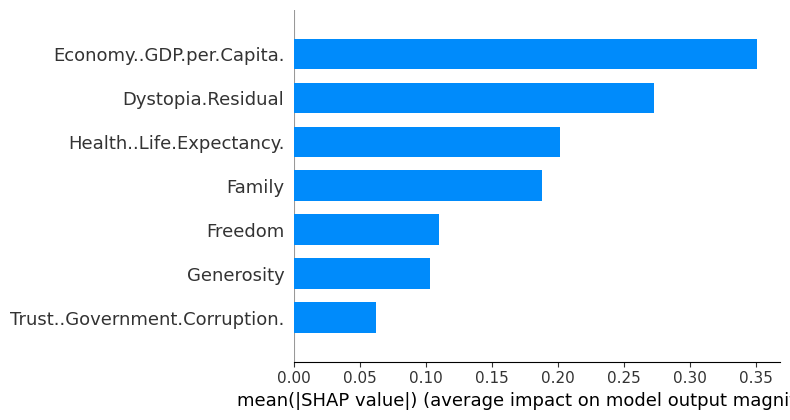

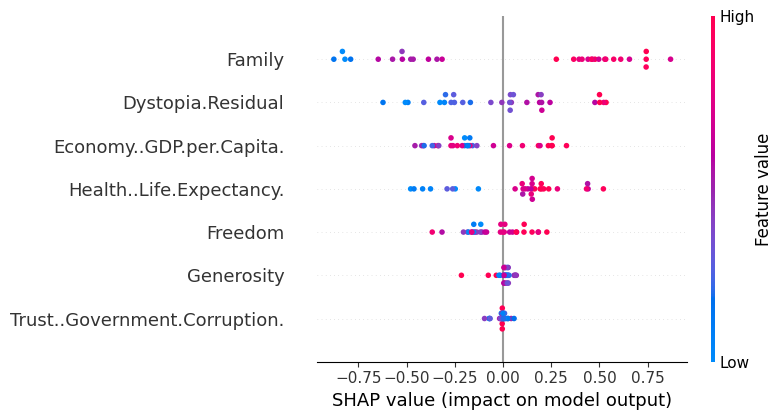

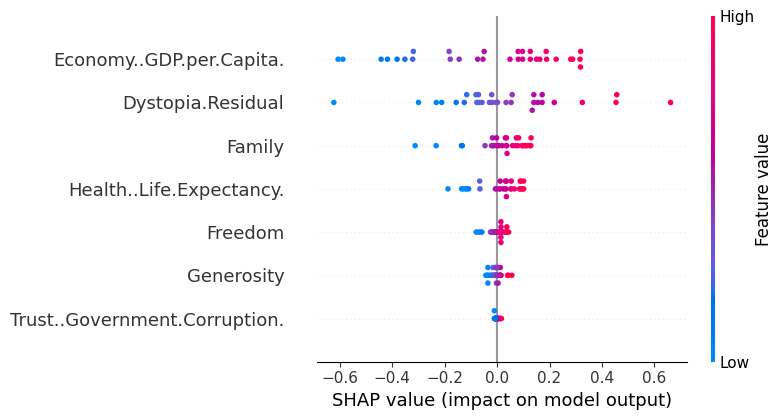

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
import shap
from tpot import TPOTRegressor



# Assuming 'target' is your target variable. Replace 'target' with your actual target column name.
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Step 1: Fit a linear model and interpret the regression coefficients
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Interpret the regression coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': linear_model.coef_})
print("Linear Regression Coefficients:")
print(coefficients)


# Step 2: Fit a tree-based model and interpret the nodes
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Plot the decision tree with labels
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, fontsize=8, class_names=True, node_ids=True)
plt.show()



# Step 3: Use AutoML to find the best model
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', ElasticNetCV(l1_ratio=1.0, random_state=42, tol=1e-5))
])
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Extract the final model from the TPOT pipeline
best_model = tpot.fitted_pipeline_.steps[-1][1]

# Step 4: Run SHAP analysis on the models from steps 1, 2, and 3
# Linear model SHAP analysis
linear_explainer = shap.Explainer(linear_model, X_train)
linear_shap_values = linear_explainer.shap_values(X_test)

# Tree-based model SHAP analysis
tree_explainer = shap.TreeExplainer(tree_model)
tree_shap_values = tree_explainer.shap_values(X_test)

# AutoML model SHAP analysis
automl_explainer = shap.Explainer(best_model, X_train)
automl_shap_values = automl_explainer.shap_values(X_test)

# Interpret the SHAP values and compare them with other model interpretability methods
shap.summary_plot(linear_shap_values, X_test, plot_type="bar", title="Linear Model SHAP Values")
shap.summary_plot(tree_shap_values, X_test, title="Tree-based Model SHAP Values")
shap.summary_plot(automl_shap_values, X_test, title="AutoML Model SHAP Values")



1. Fit a linear model and interpret the regression coefficients

- A linear regression model (LinearRegression()) is trained on the training data (X_train, y_train).
- The coefficients of the trained linear model are extracted using linear_model.coef_.
- Each row corresponds to a feature in your dataset.
The coefficient column represents the weight or coefficient assigned to each feature by the linear regression model.
- These coefficients indicate the change in the target variable (in your case, Happiness.Score) for a one-unit change in the corresponding feature, assuming all other features remain constant.

2. Fit a tree-based model and interpret the nodes
- This output is generated during the training process of an AutoML algorithm called TPOTRegressor. TPOT (Tree-based Pipeline Optimization Tool)



3.  Use auto ml to find the best model
- ElasticNetCV: This is the machine learning model selected as part of the best pipeline. ElasticNetCV is a type of linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization techniques. It automatically tunes the regularization parameters (alpha) using cross-validation to find the best fit for the data.

- RobustScaler(input_matrix): This is the preprocessing step applied to the input data. The input data is scaled using RobustScaler, which scales features using statistics that are robust to outliers. The term "input_matrix" refers to the input data matrix passed to the pipeline.

- l1_ratio=1.0: This parameter specifies the mixing parameter for ElasticNet regularization. A value of 1.0 indicates that the regularization penalty is entirely L1 (Lasso) regularization, meaning it encourages sparsity in the coefficient weights.

- tol=1e-05: This parameter sets the tolerance for the optimization algorithm used in ElasticNetCV. It specifies the stopping criterion for the optimization process, indicating the minimum change in the loss function required to continue the optimization.

- Overall, the output indicates that the best pipeline identified by TPOTRegressor consists of an ElasticNetCV model with RobustScaler preprocessing applied to the input data. The ElasticNetCV model uses L1 regularization exclusively (l1_ratio=1.0) and has a tolerance of 1e-05 for optimization convergence.

REFERENCES:

- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb
- chatpt

MIT License

Copyright (c) 2024 prachichatur04

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

